In [1]:
# Import each module in the order that it will be executed
import PySAM.Pvsamv1 as PVSAM
import PySAM.Grid as Grid
import PySAM.Utilityrate5 as UtilityRate
import PySAM.Singleowner as SingleOwner

# Also import JSON to load the inputs
import json
# For paths
import os
import pathlib

In [2]:
pvbatt_model = PVSAM.new()
grid = Grid.from_existing(pvbatt_model)
utility_rate = UtilityRate.from_existing(pvbatt_model)
single_owner = SingleOwner.from_existing(pvbatt_model)

In [ ]:
# %% Load the inputs from the JSON file for each module
dir = os.path.join(pathlib.Path.home(), 'ecen5407', 'ecen5407_project2', "data", "PySam_Inputs", "PV_Battery_System_Demo")
prefix = 'PV_Battery_System_Demo_'
file_names = ["pvsamv1", "grid", "utilityrate5", "singleowner"]
modules = [pvbatt_model, grid, utility_rate, single_owner]
for f, m in zip(file_names, modules):
    # filepath = dir + prefix + f + '.json'
    filepath = os.path.join(dir, prefix + f + '.json')
    print(f"Loading inputs from {filepath}")
    with open(filepath, 'r') as file:
        data = json.load(file)
        # Loop through each key-value pair and set the module inputs
        for k, v in data.items():
            if k != 'number_inputs' and 'adjust_' not in k:
                m.value(k, v)

Loading inputs from /home/emco4286/ecen5407/ecen5407_project2/data/PySam_Inputs/PV_Battery_System_Demo/PV_Battery_System_Demo_pvsamv1.json
Loading inputs from /home/emco4286/ecen5407/ecen5407_project2/data/PySam_Inputs/PV_Battery_System_Demo/PV_Battery_System_Demo_grid.json
Loading inputs from /home/emco4286/ecen5407/ecen5407_project2/data/PySam_Inputs/PV_Battery_System_Demo/PV_Battery_System_Demo_utilityrate5.json
Loading inputs from /home/emco4286/ecen5407/ecen5407_project2/data/PySam_Inputs/PV_Battery_System_Demo/PV_Battery_System_Demo_singleowner.json


In [6]:
filename = os.path.join(pathlib.Path.home(), 'ecen5407', 'ecen5407_project2', "data", "222628_32.73_-117.18_2012_interpolated.csv")
pvbatt_model.SolarResource.solar_resource_file = filename

In [7]:
for m in modules:
    m.execute()

In [8]:

# %% Print some example results to show that execution was successful
print(f"{pvbatt_model.value('batt_computed_bank_capacity'):,.0f} kWh battery cycled {pvbatt_model.Outputs.batt_cycles[-1]} times.\n")
print(f"Annual system AC output in year {pvbatt_model.value('analysis_period')} = {pvbatt_model.Outputs.annual_export_to_grid_energy[-1]:.3f} kWh")

40,000 kWh battery cycled 18223.0 times.

Annual system AC output in year 25.0 = 44762074.623 kWh


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [28]:
nsrdb = pd.read_csv(filename, skiprows=2, usecols=['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'DHI', 'GHI',
       'DNI', 'Surface Albedo', 'Wind Speed', 'Pressure'])
local_index = pd.DatetimeIndex(nsrdb['Year'].astype(str) + '-' + nsrdb['Month'].astype(str) +
                             '-' + nsrdb['Day'].astype(str) + ' ' + nsrdb['Hour'].astype(str) +
                               ':' + nsrdb['Minute'].astype(str))
nsrdb.set_index(local_index, inplace=True)

In [49]:
nsrdb['poa_eff'] = list(pvbatt_model.Outputs.poa_eff)[:105408]
nsrdb['dc_net'] = list(pvbatt_model.Outputs.dc_net)[:105408]
nsrdb['batt_capacity_percent'] = list(pvbatt_model.Outputs.batt_capacity_percent)[:105408]
nsrdb["batt_power_dc"] = list(pvbatt_model.Outputs.batt_power_dc)[:105408]
nsrdb["gen"] = list(pvbatt_model.Outputs.gen)[:105408]


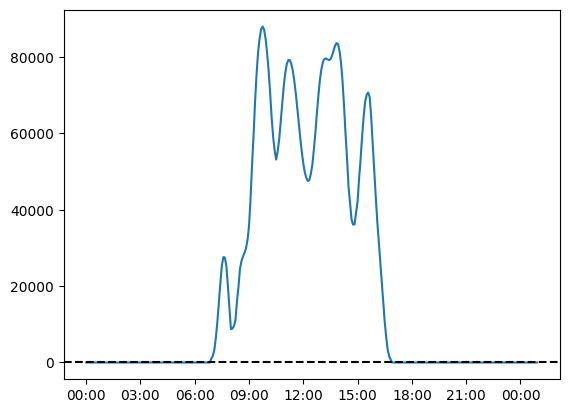

In [39]:
date_form = DateFormatter("%H:%M")
    
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(date_form)

idx = nsrdb.index[:300]
ax.plot(idx, nsrdb.loc[idx, "poa_eff"])
ax.axhline(0, ls='--', c='k');

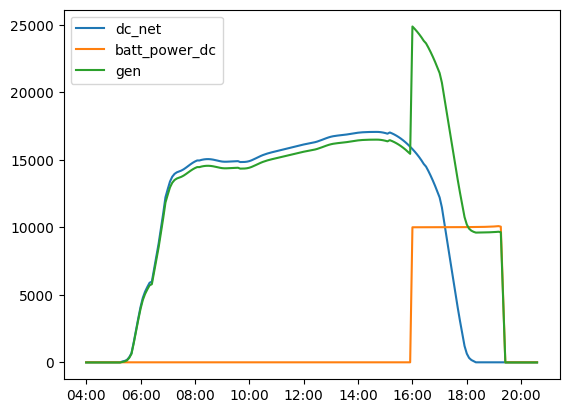

In [50]:
date_form = DateFormatter("%H:%M")
    
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(date_form)

idx = nsrdb.index[30000:30200]
ax.plot(idx, nsrdb.loc[idx, "dc_net"], label="dc_net")

ax.plot(idx, nsrdb.loc[idx,"batt_power_dc"], label="batt_power_dc")

ax.plot(idx, nsrdb.loc[idx,"gen"], label="gen")

ax.legend()